In [91]:
import pandas as pd
import numpy as np
import os
import json
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# We will compare the time it takes to load files into pandas from a CSV file and Parquet

In [62]:
nrows = [1,2,10,50,100,1000,10000,10000,500000,1000000]
ncols = [1,2,4,8,16,32,64]

In [63]:
for c in ncols:
    for r in nrows:
        df = pd.DataFrame(np.random.normal(size=(r,c)))
        
        #Set the columns name
        df.columns = [f"Col_{i}" for i in range(c)]
        
        #save csv file
        df.to_csv(f'../data/{r}_{c}.csv', index=False)
        
        #save parquet file
        df.to_parquet(f'../data/{r}_{c}.parquet', engine='pyarrow', index=False, compression=None)

In [64]:
## Plotting the size on disk of parquet file vs csv file
size_ratio = {}
for c in ncols:
    size_ratio[f'{c}'] = []
    for r in nrows:
        size_ratio[f'{c}'].append(os.path.getsize(f'../data/{r}_{c}.parquet') / os.path.getsize(f'../data/{r}_{c}.csv'))



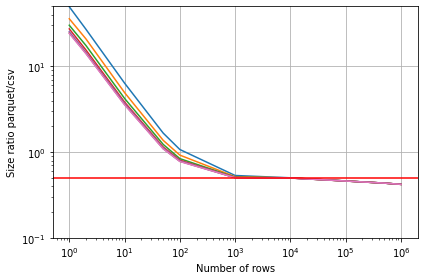

In [65]:

fig, ax = plt.subplots()
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'])

ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,50])
ax.grid(True)

fig.tight_layout()
plt.show()

In [66]:
## Loading the CSV or Parquet in memory

In [78]:
N = 500

def load_csv(c, r):
    pd.read_csv(f'../data/{r}_{c}.csv')

def load_parquet(c, r):
    pd.read_parquet(f'../data/{r}_{c}.parquet')

In [82]:
## Plotting the size on disk of parquet file vs csv file
speed_ratio = {}
for c in ncols:
    speed_ratio[f'{c}'] = []
    for r in nrows:
        speed_ratio[f'{c}'].append(timeit.Timer(lambda: load_csv(c, r)).timeit(N) / timeit.Timer(lambda: load_parquet(c, r)).timeit(N))






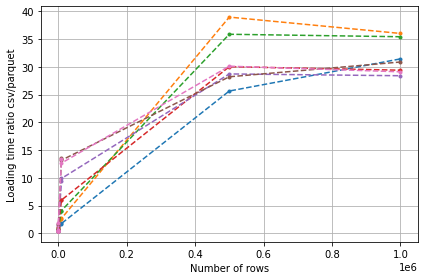

In [89]:

fig, ax = plt.subplots()
for c in ncols:
    ax.plot(nrows, speed_ratio[f'{c}'], '.--')

ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim([0.1,50])
ax.grid(True)

fig.tight_layout()
plt.show()

In [90]:
#Save analysis to disk

with open('../data/size.json', "wr") as f:
    json.dump(size_ratio, f)

    
with open('../data/speed.json', "wr") as f:
    json.dump(speed_ratio, f)

    
a_file.close()

a_file = open(
    
    "data.json", "r")

output = a_file.read()

print(output)

Output

{"a": 1, "b": 2}

a_file.close()


{'1': [0.6405939685526411,
  0.6449250310989013,
  0.6165834069356881,
  0.6515331929496586,
  0.6714793238361257,
  0.7901633196512767,
  1.740542065085462,
  1.7933026723947227,
  25.630367245305283,
  31.415850769623916],
 '2': [0.6427526620405817,
  0.6422326250016055,
  0.6460208501588923,
  0.6587824624743066,
  0.6761317794601794,
  0.8859180853043119,
  2.670511507442619,
  2.70259833247682,
  38.93538412770653,
  35.994428946549775],
 '4': [0.6196614168095416,
  0.6217652936355622,
  0.6257067017030499,
  0.6447330315362584,
  0.6678830672626599,
  1.0292081438252512,
  4.119171750905874,
  4.109779760012621,
  35.84522866110852,
  35.40023723592267],
 '8': [0.5898860554441451,
  0.5791543440991539,
  0.5736806720187732,
  0.6177152333886942,
  0.6545478820037692,
  1.2300806788341407,
  6.0165939903375865,
  6.01195788775051,
  30.01069357320059,
  29.377728065570274],
 '16': [0.5260850946165158,
  0.5190977414166469,
  0.5290078627475087,
  0.5144231993366789,
  0.5532334342